In [2]:
# This example show the use of ordinary least squares to estimate the parameters of a linear model
# The principle of this example is to generate samples from the parameters R of a reference model
# and to check that the solution S is close to these parameters R.
# The solution is computed using the direct solution (analytical inversion of A).

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Parameters of the problem
R           = np.array([[1],[2]]) # Reference model: R is the expected solution A * R = Y
sigmaY      = 0.2                 # standard deviation of the noise applied to the observed values
N           = 100                 # Number of samples
seedinit    = 0                   # Initialization value for random generation

Reference parameters [1 2]
Computed parameters [1.04169429 1.93993397]


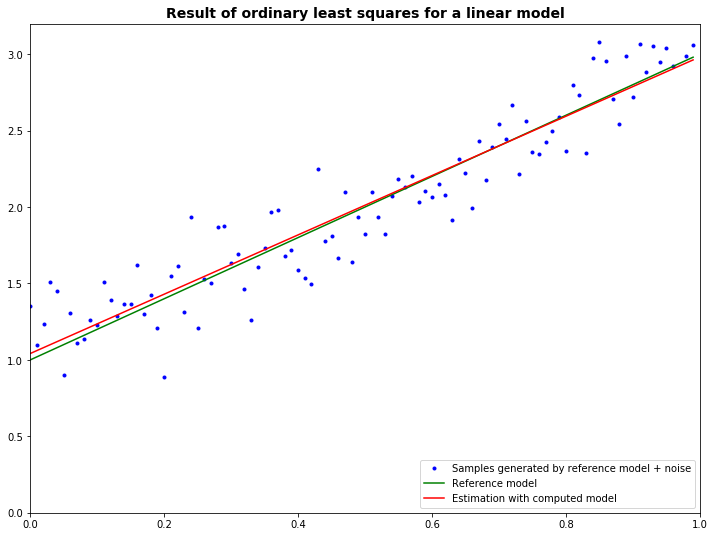

In [5]:
# Initializing the generator the control the reproducibility of the test
np.random.seed(seedinit)
# Generating the input values
X = np.arange(0, 1, 1.0/N, dtype=float).reshape(N, 1)
# Building the matrix: A x = y
A = np.concatenate((np.ones((N, 1), dtype=float), X), axis=1)
# Generating observed values
Y = np.matmul(A, R) + sigmaY * np.random.randn(N, 1)
# Computing the solution from analytical inversion of the matrix A' * A
sumx = np.sum(X)
sumy = np.sum(Y)
sumx2 = np.sum(np.square(X))
sumxy = np.sum(X * Y)
S = np.divide(np.array([[(sumx2 * sumy - sumx * sumxy)], [(-sumx * sumy + N * sumxy)]]), (N * sumx2 - sumx**2))
print("Reference parameters", R.reshape(2))
print("Computed parameters", S.reshape(2))
# Computing an estimate based on the computed model
Z = np.matmul(A, S)
# Generating a figure to display the result
plt.figure(figsize=(12, 9))
plt.title('Result of ordinary least squares for a linear model', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.axis([0, 1, 0, (R[0][0] + R[1][0] + sigmaY) ])
plt.plot(X, Y, 'b.', label='Samples generated by reference model + noise')
plt.plot(X, np.matmul(A, R), 'g', label='Reference model')
plt.plot(X, Z, 'r', label='Estimation with computed model')
plt.legend(loc='lower right')